In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
data_path="/neurospin/dico/rmenasria/Runs/03_main/Input/remote_data/ph_p_dhx.csv"

In [3]:
# load data
df = pd.read_csv(data_path)

/tmp/ipykernel_1916808/719241282.py:2: DtypeWarning: Columns (25,33,64,78,111,115,123,131,162,169) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [4]:
# Statistics
print("Number of participants:", df['src_subject_id'].nunique())




Number of participants: 11865


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

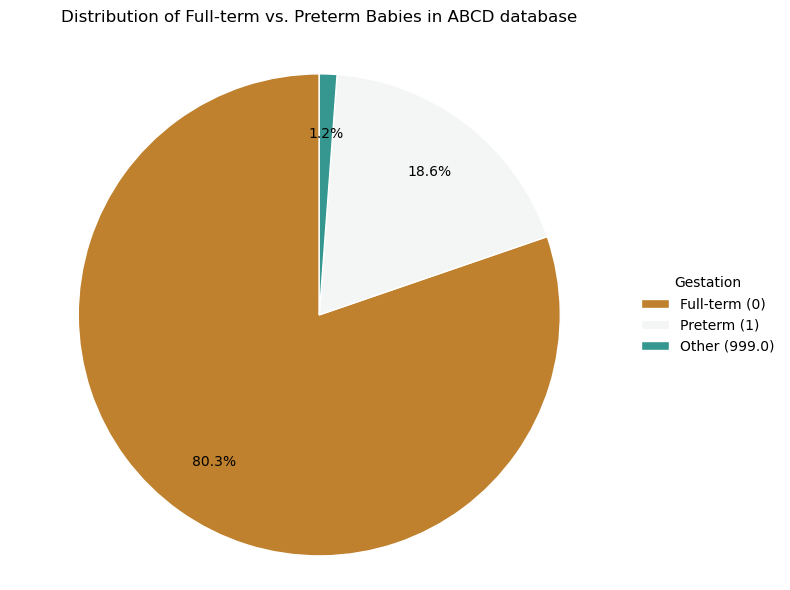

In [5]:
# devhx_12a_p # 0 = Full-term, 1 = Preterm, 999 = Other

from matplotlib import colormaps
print(list(colormaps))

# Compute counts, dropping NaNs
counts = df['devhx_12a_p'].dropna().value_counts().sort_index()

# Build labels from the actual index values
def make_label(val):
    if val == 0:
        return 'Full-term (0)'
    elif val == 1:
        return 'Preterm (1)'
    else:
        return f'Other ({val})'

labels = [make_label(v) for v in counts.index]

# Generate a Viridis-based color list
colors = plt.cm.BrBG((np.linspace(0.2, 0.8, len(counts))))

# Plot pie without inline labels
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=None,              
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,          # bring %’s a bit inward
    wedgeprops={'edgecolor': 'white'}
)

# Add legend outside the chart
ax.legend(
    wedges,
    labels,
    title="Gestation",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.3, 1),
    frameon=False
)

# Tidy up title and layout
ax.set_title('Distribution of Full-term vs. Preterm Babies in ABCD database', pad=20)
ax.axis('equal') 
plt.tight_layout()
plt.show()


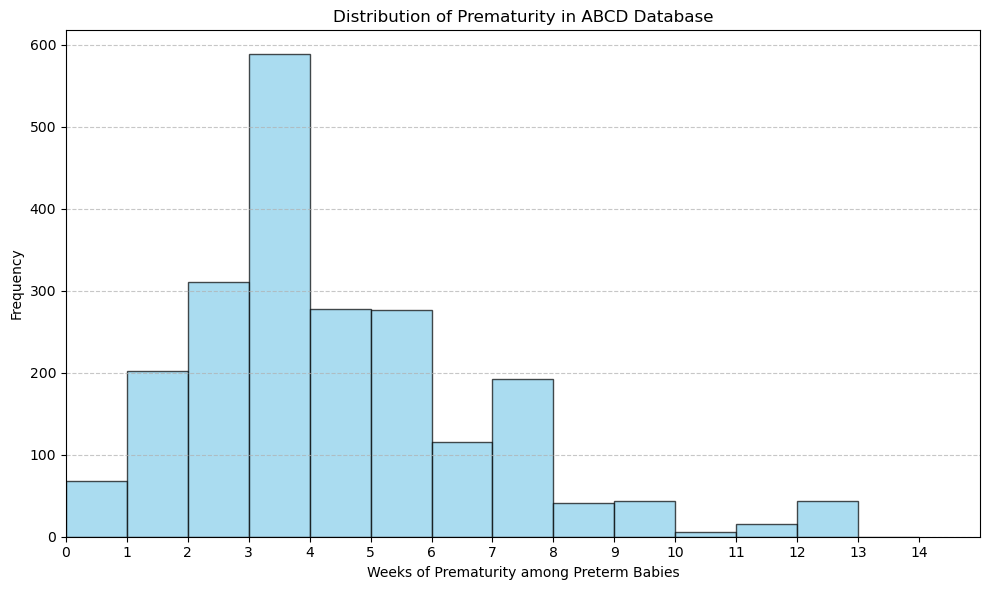

In [6]:
# Prematurity distribution ABCD
# the devhx_12_p gives how many weeks the baby was born before the 37th week of gestation

# Histogram of prematurity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['devhx_12_p'].dropna()-1, bins=np.arange(0, 15, 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prematurity in ABCD Database')
plt.xlabel('Weeks of Prematurity among Preterm Babies')
plt.ylabel('Frequency')
plt.xlim(0, 15)  # Limit x-axis to show relevant range
plt.xticks(np.arange(0, 15, 1))  # Set x-ticks for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

17     9.0
18    10.0
22    13.0
23     1.0
25     9.0
28     4.0
29     4.0
32    14.0
33    10.0
34    15.0
Name: birth_weight_oz, dtype: float64


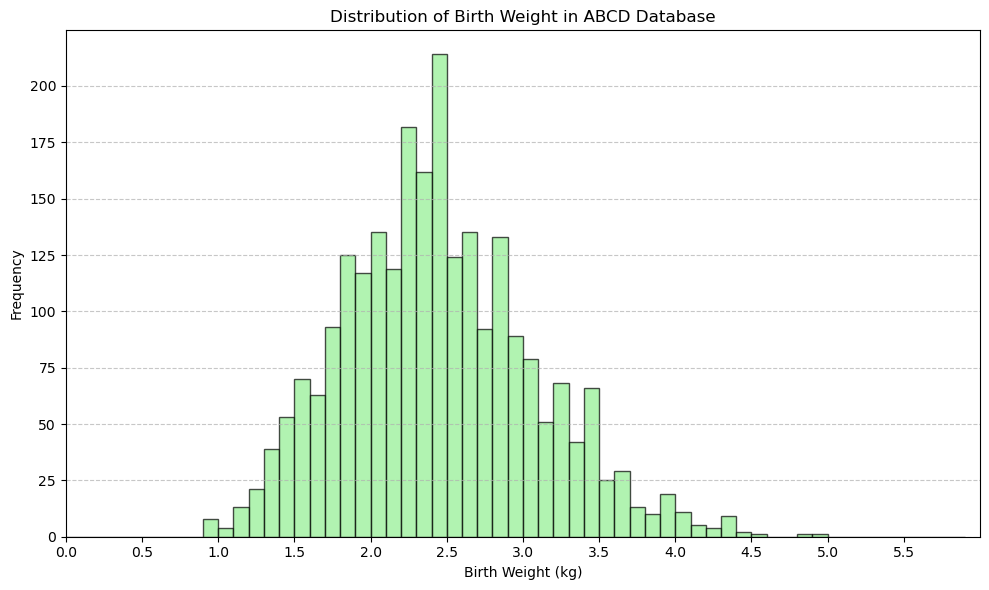

In [22]:
# Prematurity distribution ABCD
# the birth_weight_lbs and birth_weight_oz gives the birth weight in pounds and ounces respectively


# birth_weight_kg 

df['birth_weight_kg'] = df['birth_weight_lbs'] * 0.453592 + df['birth_weight_oz'] * 0.0283495

# Histogram of birth weight distribution
plt.figure(figsize=(10, 6))
plt.hist(df['birth_weight_kg'].dropna(), bins=np.arange(0, 6, 0.1), color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Birth Weight in ABCD Database')
plt.xlabel('Birth Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(0, 6)  # Limit x-axis to show relevant range
plt.xticks(np.arange(0, 6, 0.5))  # Set x-ticks for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


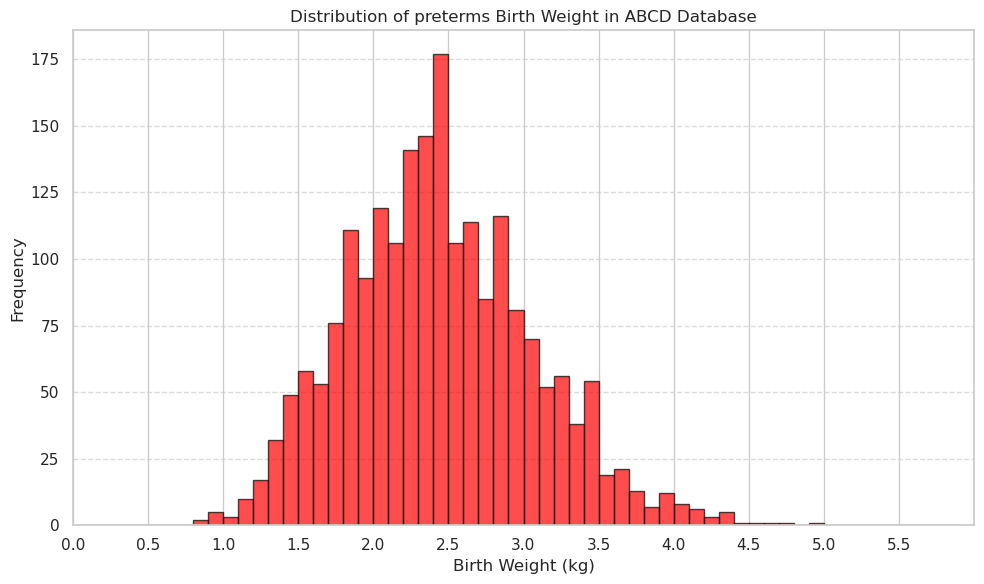

In [55]:
premature_df = df[df['devhx_12a_p'] == 1]

# Histogram of birth weight distribution for preterm babies
plt.figure(figsize=(10, 6))
plt.hist(premature_df["birth_weight_kg"].dropna(), bins=np.arange(0, 6, 0.1), color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of preterms Birth Weight in ABCD Database')
plt.xlabel('Birth Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(0, 6)  # Limit x-axis to show relevant range
plt.xticks(np.arange(0, 6, 0.5))  # Set x-ticks for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


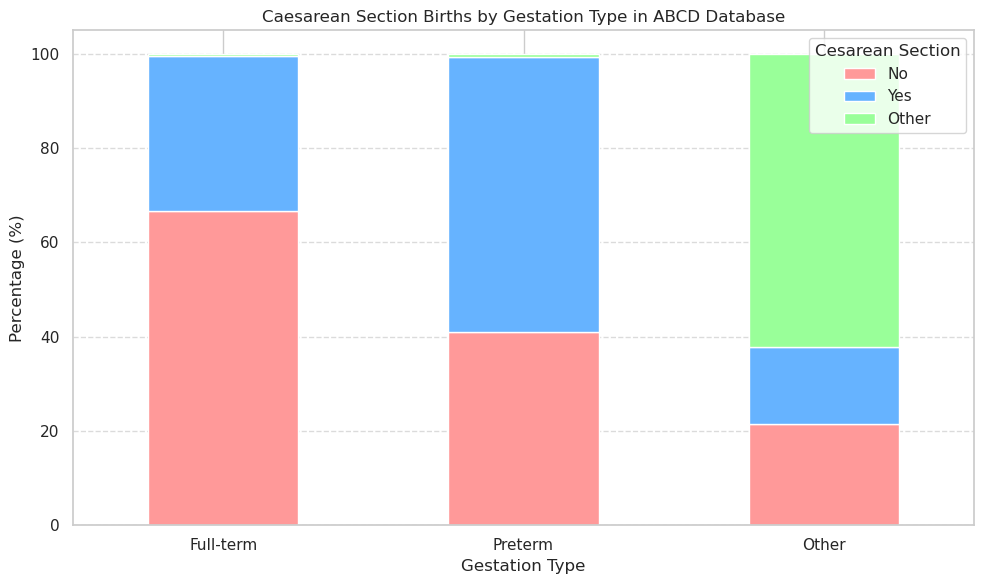

In [59]:
# devhx_13_3_p indicates if the baby was born by Caesarean section (0 = No, 1 = Yes, 999 = Other)

# Compute counts, dropping NaNs for each category : preterm and full-term

counts_caesarean = df.groupby('devhx_12a_p')['devhx_13_3_p'].value_counts().unstack().fillna(0)

# Rename the index for clarity
counts_caesarean.index = counts_caesarean.index.map({0: 'Full-term', 1: 'Preterm', 999: 'Other'})
# Convert counts to percentages
counts_caesarean_percentage = counts_caesarean.div(counts_caesarean.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
counts_caesarean_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Caesarean Section Births by Gestation Type in ABCD Database')
plt.xlabel('Gestation Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Cesarean Section', labels=['No', 'Yes', 'Other'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2992623/1028258652.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incubator_counts.index, y=incubator_counts.values, palette='viridis')


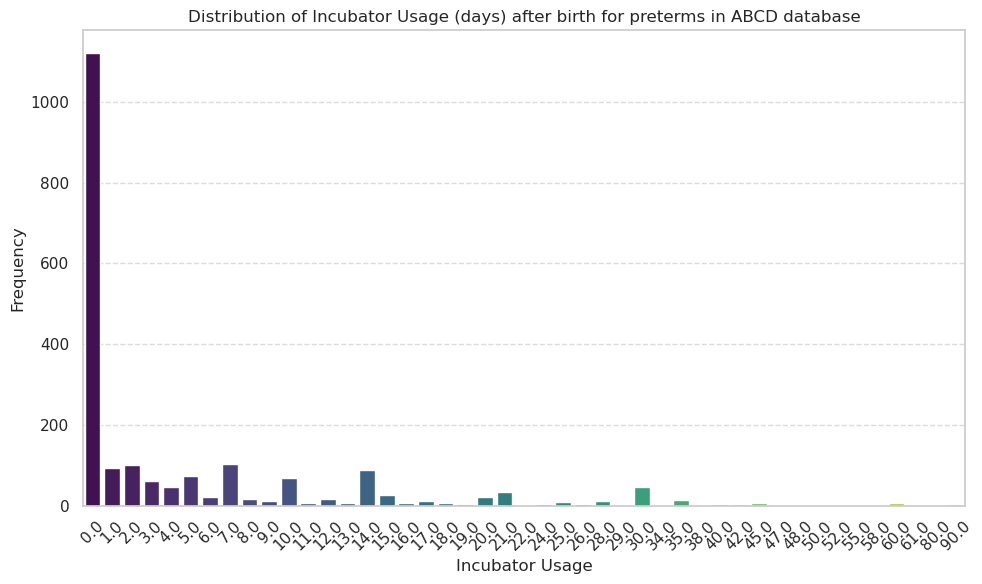

In [73]:
# devhx_15 indicates the type spent in an incubator after birth

# Plotting the distribution of incubator usage
incubator_counts = premature_df['devhx_15'].value_counts().sort_index()

# Create histogram for incubator usage among preterms
plt.figure(figsize=(10, 6))
sns.barplot(x=incubator_counts.index, y=incubator_counts.values, palette='viridis')
plt.title('Distribution of Incubator Usage (days) after birth for preterms in ABCD database')
plt.xlabel('Incubator Usage')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

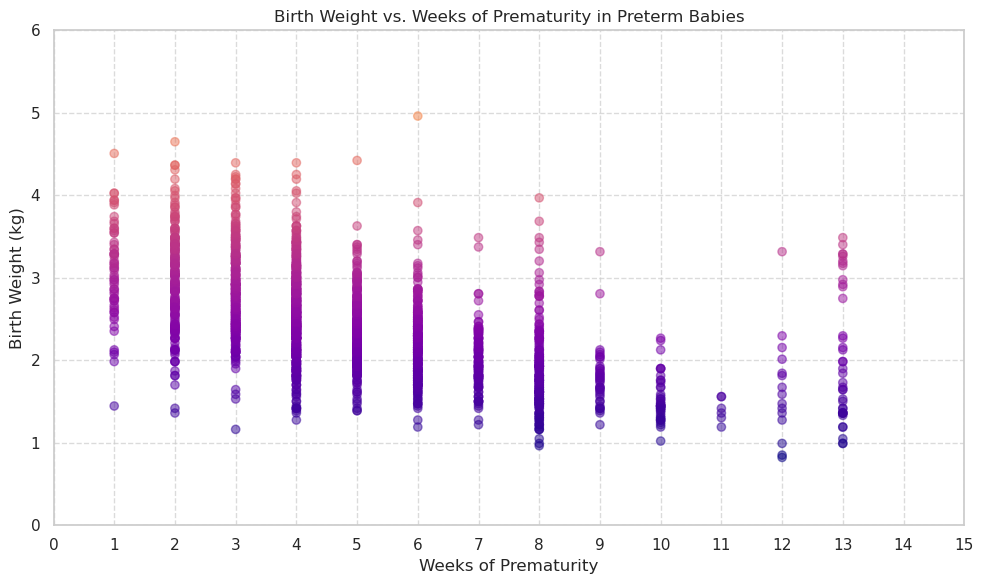

In [72]:
# scatter plot of birth weight vs. weeks of prematurity
plt.figure(figsize=(10, 6))
plt.scatter(premature_df['devhx_12_p'], premature_df['birth_weight_kg'], alpha=0.5, c=premature_df['birth_weight_kg'],cmap='plasma')
plt.title('Birth Weight vs. Weeks of Prematurity in Preterm Babies')
plt.xlabel('Weeks of Prematurity')
plt.ylabel('Birth Weight (kg)')
plt.xlim(0, 15)  # Limit x-axis to show relevant range
plt.ylim(0, 6)  # Limit y-axis to show relevant range
plt.xticks(np.arange(0, 16, 1))  # Set x-ticks for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

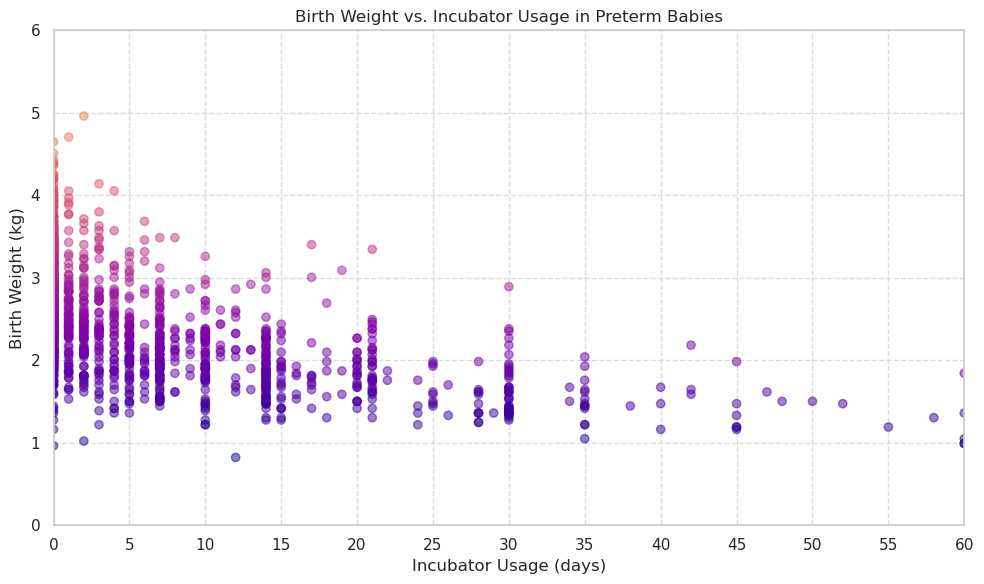

In [74]:
# Incubator usage vs. birth weight
plt.figure(figsize=(10, 6))
plt.scatter(premature_df['devhx_15'], premature_df['birth_weight_kg'], alpha=0.5, c=premature_df['birth_weight_kg'], cmap='plasma')
plt.title('Birth Weight vs. Incubator Usage in Preterm Babies')
plt.xlabel('Incubator Usage (days)')
plt.ylabel('Birth Weight (kg)')
plt.xlim(0, 60)  # Limit x-axis to show relevant range
plt.ylim(0, 6)  # Limit y-axis to show relevant range
plt.xticks(np.arange(0, 61, 5))  # Set x-ticks for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


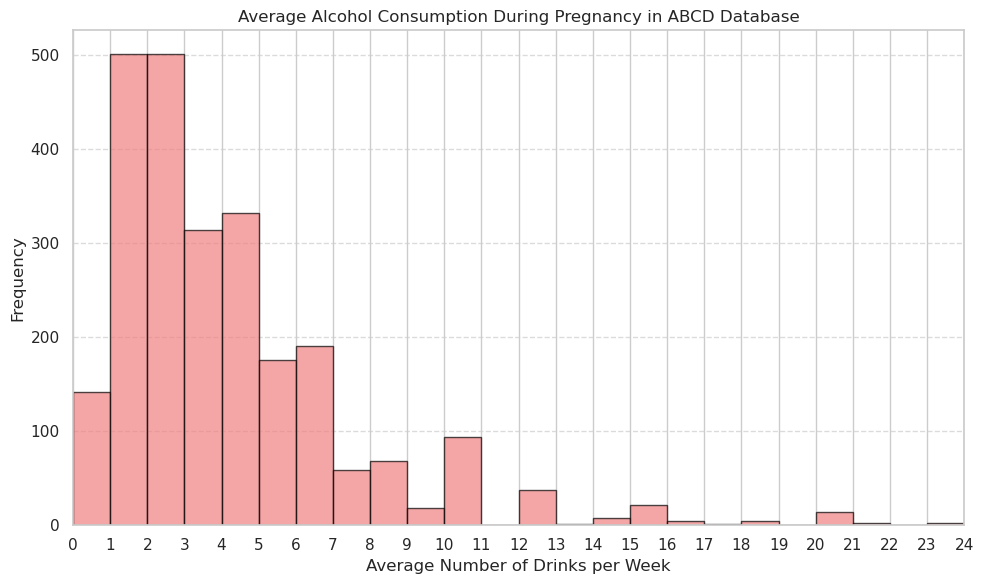

In [100]:
# devhx_8_alchohol_avg represents the average number of alcoholic drinks per week during pregnancy

# Histogram of average alcohol consumption during pregnancy
plt.figure(figsize=(10, 6))
plt.hist(df['devhx_8_alchohol_avg'].dropna(), bins=np.arange(0, 25, 1), color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Average Alcohol Consumption During Pregnancy in ABCD Database')
plt.xlabel('Average Number of Drinks per Week')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Limit x-axis to show relevant range
plt.xticks(np.arange(0, 25, 1))  # Set x-ticks for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2500


/tmp/ipykernel_2992623/3923242670.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = clean_df.groupby('alc_cat')['devhx_12a_p'] \
/tmp/ipykernel_2992623/3923242670.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.index, y='rate', data=grouped, palette='magma')


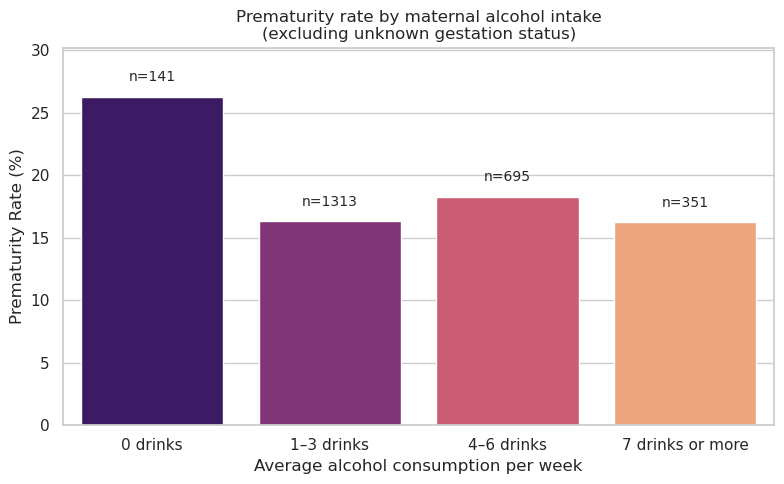

In [103]:
# Filter only the valid status(0 = full-term, 1 = preterm)
clean_df = df[df['devhx_12a_p'].isin([0, 1])].copy()

print(clean_df['devhx_8_alchohol_avg'].notna().sum())


# Alcohol consumption categories
bins = [0, 1, 4, 7, clean_df['devhx_8_alchohol_avg'].max() + 1]
labels = ['0 drinks', '1–3 drinks', '4–6 drinks', '7 drinks or more']
clean_df['alc_cat'] = pd.cut(clean_df['devhx_8_alchohol_avg'], bins=bins,
                             labels=labels, right=False)

# Calculate prematurity rate by alcohol consumption category
grouped = clean_df.groupby('alc_cat')['devhx_12a_p'] \
                  .agg(n='count', rate=lambda x: x.mean() * 100)

# PLot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=grouped.index, y='rate', data=grouped, palette='magma')

# Annotate the bars with counts
for i, (_, row) in enumerate(grouped.iterrows()):
    ax.text(i, row['rate'] + 1, f"n={int(row['n'])}", 
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Prematurity Rate (%)')
ax.set_xlabel('Average alcohol consumption per week')
ax.set_title('Prematurity rate by maternal alcohol intake\n(excluding unknown gestation status)')
ax.set_ylim(0, grouped['rate'].max() * 1.15)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2992623/1804515280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alc_cat', y='devhx_12_p', data=preterm_age_filtered, palette='magma')


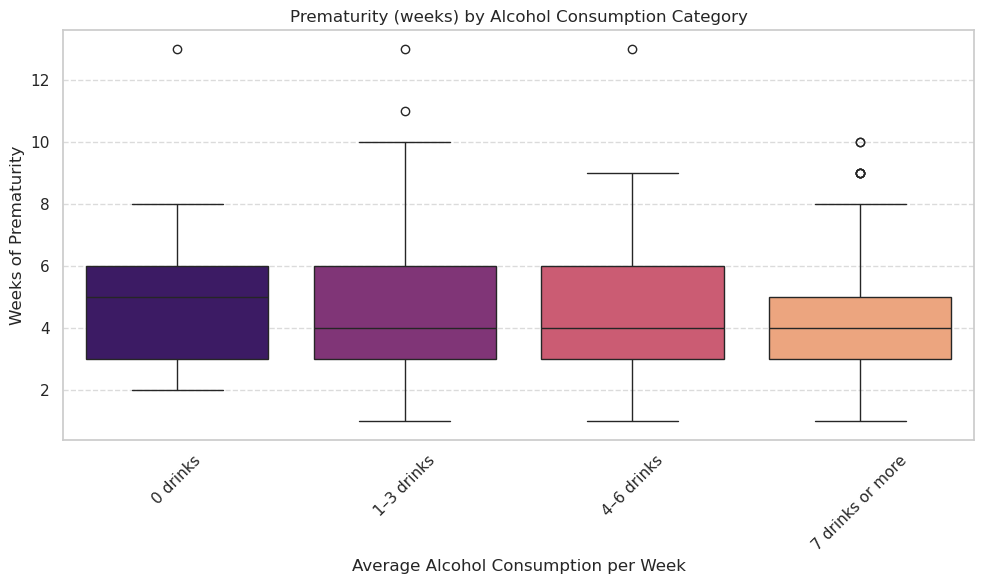

In [106]:
# Filter to only keep the preterms with  devhx_12_p between 0 and 15
preterm_age_filtered = clean_df[(clean_df['devhx_12_p'] >= 0) & (clean_df['devhx_12_p'] <= 15)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='alc_cat', y='devhx_12_p', data=preterm_age_filtered, palette='magma')
plt.title('Prematurity (weeks) by Alcohol Consumption Category')
plt.xlabel('Average Alcohol Consumption per Week')
plt.ylabel('Weeks of Prematurity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


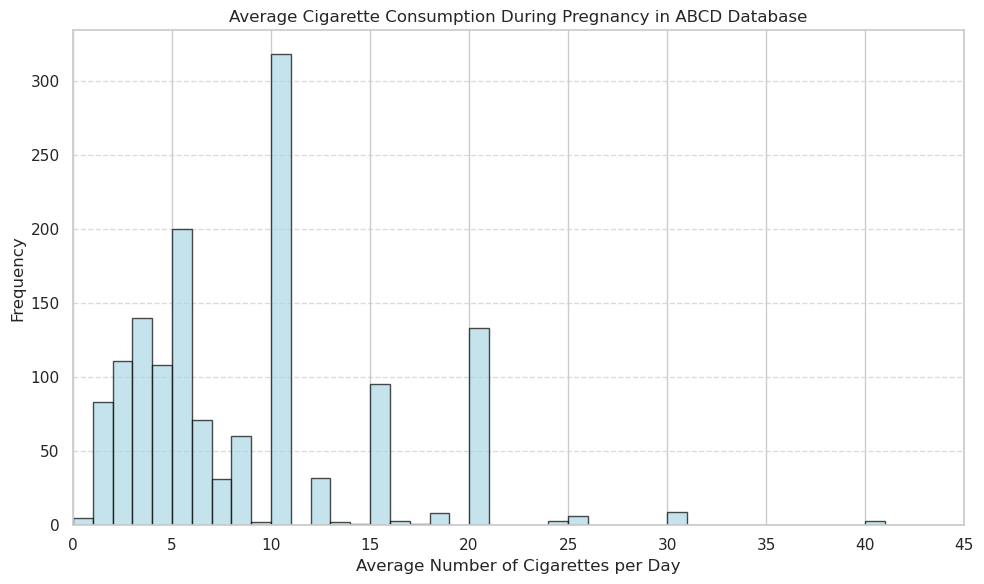

In [112]:
# devhx_8_cigs_per_day represents the average number of cigarettes smoked per day during pregnancy

# Histogram of average cigarette consumption during pregnancy
plt.figure(figsize=(10, 6))
plt.hist(df['devhx_8_cigs_per_day'].dropna(), bins=np.arange(0, 50, 1), color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Average Cigarette Consumption During Pregnancy in ABCD Database')
plt.xlabel('Average Number of Cigarettes per Day')
plt.ylabel('Frequency')
plt.xlim(0, 30)  # Limit x-axis to show relevant range
plt.xticks(np.arange(0, 50, 5))  # Set x-ticks for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2992623/638425730.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


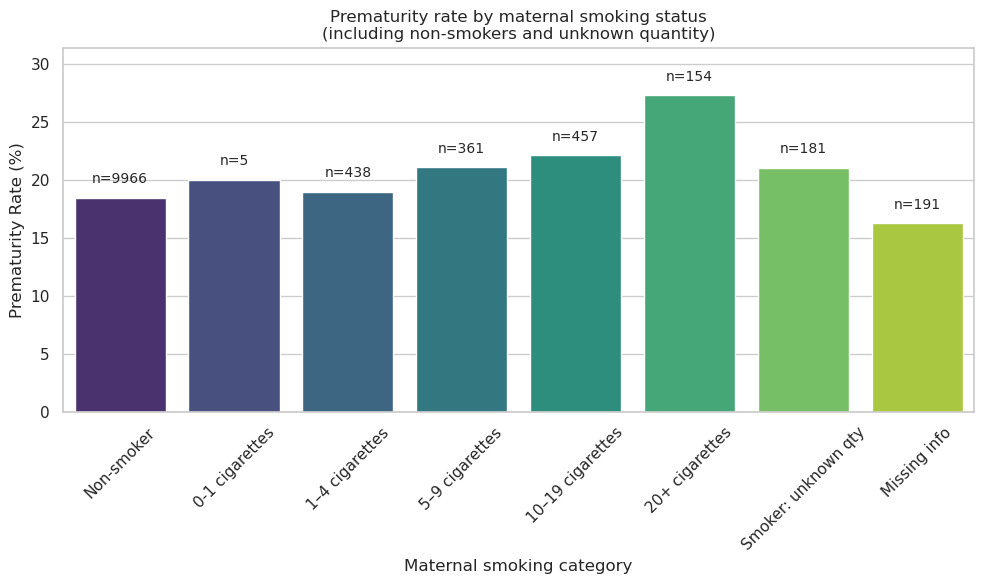

In [127]:
#Filter to known gestation status (0 = full-term, 1 = preterm)
clean_df = df[df['devhx_12a_p'].isin([0, 1])].copy()

# Create a smoking category column
def categorize_smoking(row):
    if row['devhx_8_tobacco'] == 0:
        return 'Non-smoker'
    elif row['devhx_8_tobacco'] == 1:
        if pd.notna(row['devhx_8_cigs_per_day']):
            # Known daily cigarette count
            n = row['devhx_8_cigs_per_day']
            if n < 1:
                return '0-1 cigarettes'
            elif n < 5:
                return '1–4 cigarettes'
            elif n < 10:
                return '5–9 cigarettes'
            elif n < 20:
                return '10–19 cigarettes'
            else:
                return '20+ cigarettes'
        elif pd.notna(row['devhx_8_cigs_per_day_dk']):
            # Don't know how many
            return 'Smoker: unknown qty'
    return 'Missing info'

clean_df['smoking_cat'] = clean_df.apply(categorize_smoking, axis=1)

# Compute prematurity rate and counts by smoking category
grouped = (
    clean_df
    .groupby('smoking_cat')['devhx_12a_p']
    .agg(n='count', rate=lambda x: x.mean() * 100)
    .reindex([
        'Non-smoker',
        '0-1 cigarettes',
        '1–4 cigarettes',
        '5–9 cigarettes',
        '10–19 cigarettes',
        '20+ cigarettes',
        'Smoker: unknown qty',
        'Missing info'
    ])  # enforce a logical order
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=grouped.index,
    y='rate',
    data=grouped.reset_index(),
    palette='viridis'
)

# Annotate each bar with the sample size
for i, row in enumerate(grouped.itertuples()):
    ax.text(i, row.rate + 1, f"n={int(row.n)}",
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Prematurity Rate (%)')
ax.set_xlabel('Maternal smoking category')
ax.set_title('Prematurity rate by maternal smoking status\n(including non-smokers and unknown quantity)')
ax.set_ylim(0, grouped['rate'].max() * 1.15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2992623/3899894025.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


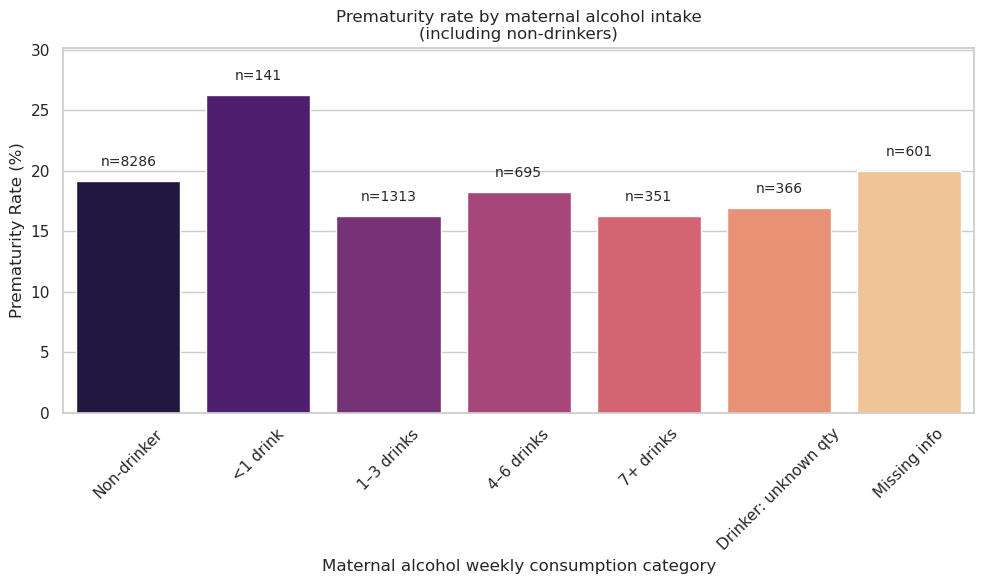

In [125]:
# Filter to known gestation status (0 = full-term, 1 = preterm)
clean_df = df[df['devhx_12a_p'].isin([0, 1])].copy()

# Create an alcohol category column
def categorize_alcohol(row):
    # 0 = no alcohol before knowing of pregnancy
    if row['devhx_8_alcohol'] == 0:
        return 'Non-drinker'
    # 1 = drank alcohol, now check quantity
    elif row['devhx_8_alcohol'] == 1:
        if pd.notna(row['devhx_8_alchohol_avg']):
            # Known average drinks per week
            n = row['devhx_8_alchohol_avg']
            if n < 1:
                return '<1 drink'
            elif n < 4:
                return '1–3 drinks'
            elif n < 7:
                return '4–6 drinks'
            else:
                return '7+ drinks'
        elif pd.notna(row['devhx_8_alchohol_avg_dk']):
            # Don’t know quantity
            return 'Drinker: unknown qty'
    return 'Missing info'

clean_df['alcohol_cat'] = clean_df.apply(categorize_alcohol, axis=1)

# Compute prematurity rate and counts by alcohol category
ordered_cats = [
    'Non-drinker','<1 drink', '1–3 drinks',
    '4–6 drinks', '7+ drinks', 'Drinker: unknown qty', 'Missing info'
]
grouped = (
    clean_df
    .groupby('alcohol_cat')['devhx_12a_p']
    .agg(n='count', rate=lambda x: x.mean() * 100)
    .reindex(ordered_cats)
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=grouped.index,
    y='rate',
    data=grouped.reset_index(),
    palette='magma'
)

# Annotate with sample size
for i, row in enumerate(grouped.itertuples()):
    ax.text(i, row.rate + 1, f"n={int(row.n)}",
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Prematurity Rate (%)')
ax.set_xlabel('Maternal alcohol weekly consumption category')
ax.set_title('Prematurity rate by maternal alcohol intake\n(including non-drinkers)')
ax.set_ylim(0, grouped['rate'].max() * 1.15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


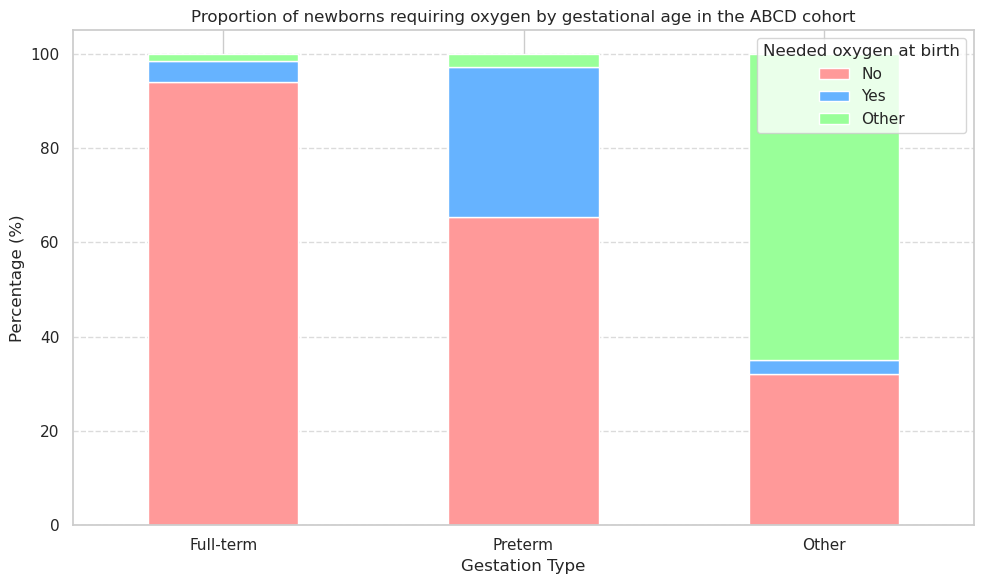

In [130]:
# devhx_14f3_p indicates if the baby needed oxygen at birth (0 = No, 1 = Yes, 999 = Other)

# Compute counts, dropping NaNs for each category : preterm and full-term

counts_oxygen = df.groupby('devhx_12a_p')['devhx_14f3_p'].value_counts().unstack().fillna(0)

# Rename the index for clarity
counts_oxygen.index = counts_oxygen.index.map({0: 'Full-term', 1: 'Preterm', 999: 'Other'})
# Convert counts to percentages
counts_oxygen_percentage = counts_oxygen.div(counts_oxygen.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
counts_oxygen_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Proportion of newborns requiring oxygen by gestational age in the ABCD cohort')
plt.xlabel('Gestation Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Needed oxygen at birth', labels=['No', 'Yes', 'Other'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2992623/370933936.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['prematurity_class', 'motor_dev_cat'])


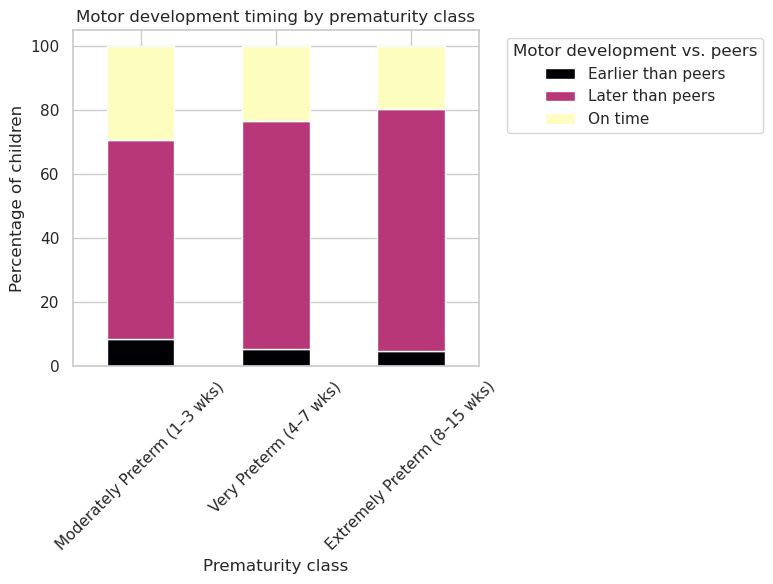

In [ ]:
# devhx_20_p indicates if child motor development (sitting, crawling, walking) was earlier, average, or later than most other children



# Keep only true motor‐dev codes and map to labels
valid_df = clean_df[clean_df['devhx_20_p'].isin([1, 2, 3])].copy()
motor_map = {1: 'Earlier than peers', 2: 'On time', 3: 'Later than peers'}
valid_df['motor_dev_cat'] = valid_df['devhx_20_p'].map(motor_map)

# Filter weeks of prematurity to plausible range (0–15)
valid_df = valid_df[(valid_df['devhx_12_p'] >= 0) & (valid_df['devhx_12_p'] <= 15)]

# Create prematurity classes
bins = [1, 4, 8, 16]
labels = [
    'Moderately Preterm (1–3 wks)',
    'Very Preterm (4–7 wks)',
    'Extremely Preterm (8–15 wks)'
]
valid_df['prematurity_class'] = pd.cut(
    valid_df['devhx_12_p'],
    bins=bins,
    labels=labels,
    right=False
)

# Compute counts and convert to percentages
summary = (
    valid_df
    .groupby(['prematurity_class', 'motor_dev_cat'])
    .size()
    .unstack(fill_value=0)
)
percentages = summary.div(summary.sum(axis=1), axis=0) * 100

# Plot as a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

percentages.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='magma'
)

ax.set_title('Motor development timing by prematurity class')
ax.set_xlabel('Prematurity class')
ax.set_ylabel('Percentage of children')
ax.legend(
    title='Motor development vs. peers',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2992623/3312873509.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['prematurity_class', 'speech_dev_cat'])


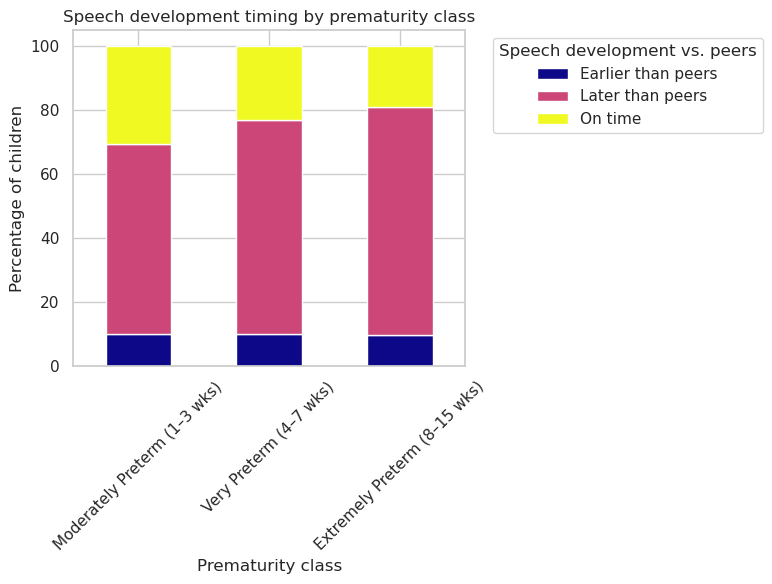

In [ ]:
# devhx_21_p indicates if child speech development was earlier, average,  or later than most other children



# Keep only true motor‐dev codes and map to labels
valid_df = clean_df[clean_df['devhx_21_p'].isin([1, 2, 3])].copy()
motor_map = {1: 'Earlier than peers', 2: 'On time', 3: 'Later than peers'}
valid_df['speech_dev_cat'] = valid_df['devhx_21_p'].map(motor_map)

# Filter weeks of prematurity to plausible range (0–15)
valid_df = valid_df[(valid_df['devhx_12_p'] >= 0) & (valid_df['devhx_12_p'] <= 15)]

# Create prematurity classes
bins = [1, 4, 8, 16]
labels = [
    'Moderately Preterm (1–3 wks)',
    'Very Preterm (4–7 wks)',
    'Extremely Preterm (8–15 wks)'
]
valid_df['prematurity_class'] = pd.cut(
    valid_df['devhx_12_p'],
    bins=bins,
    labels=labels,
    right=False
)

# Compute counts and convert to percentages
summary = (
    valid_df
    .groupby(['prematurity_class', 'speech_dev_cat'])
    .size()
    .unstack(fill_value=0)
)
percentages = summary.div(summary.sum(axis=1), axis=0) * 100

# Plot as a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

percentages.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='plasma'
)

ax.set_title('Speech development timing by prematurity class')
ax.set_xlabel('Prematurity class')
ax.set_ylabel('Percentage of children')
ax.legend(
    title='Speech development vs. peers',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1922011/3289128682.py:12: DtypeWarning: Columns (307,338,352,385,397,405,436,443) have mixed types. Specify dtype option on import or set low_memory=False.
  data_age_ABCD = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Input/ABCD/all_labels_clean_abcd.csv")


gest_age >= 37 : 0
gest_age < 37  : 1818
gest_age
33.0    486
34.0    256
31.0    240
32.0    231
35.0    169
29.0    161
30.0     97
36.0     54
24.0     38
28.0     36
27.0     36
25.0     10
26.0      4
Name: count, dtype: int64
gest_age
33.0    454
34.0    241
31.0    229
32.0    226
35.0    154
29.0    145
30.0     95
36.0     48
28.0     34
27.0     34
24.0     33
25.0     10
26.0      4
Name: count, dtype: int64
Nombre de prémas avec age de naissance : 1818
Nombre de prémas avec poids de naissance : 1707


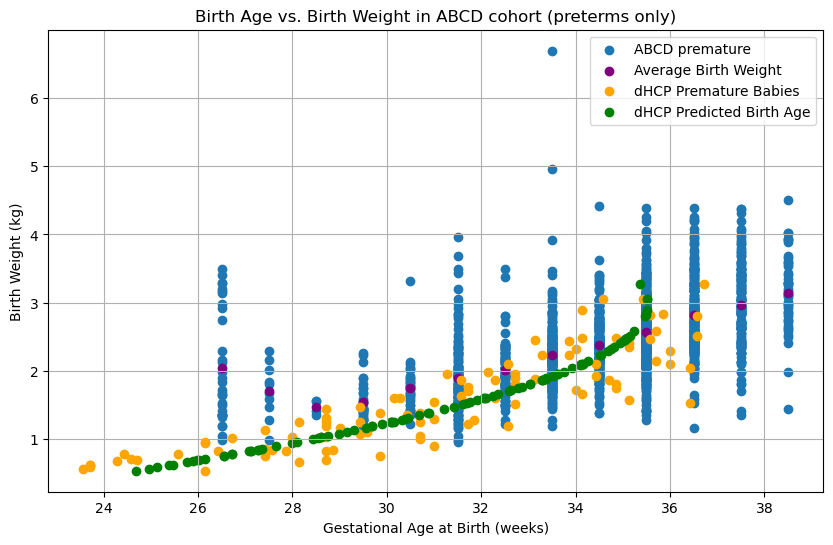

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


# load dHCP data
df_dHCP = pd.read_csv('/neurospin/dico/rmenasria/Runs/03_main/Input/dHCP/csv/all_participants_infos.csv').loc[:, ['ID', 'birth_weight', 'birth_age']]
df_dHCP_prema = df_dHCP [df_dHCP["birth_age"] < 37].copy()
X = df_dHCP_prema[['birth_weight']].values   
y = df_dHCP_prema['birth_age'].values   

# Charger les données
data_age_ABCD = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Input/ABCD/all_labels_clean_abcd.csv")

# Garder seulement les sujets avec age de naissance (prémas)
prema_data_ABCD = data_age_ABCD[data_age_ABCD['gest_age'].notna()][['src_subject_id', 'gest_age']]

df_unique = df.drop_duplicates(subset='src_subject_id')

# Fusionner avec les poids de naissance depuis df
prema_with_weight = prema_data_ABCD.merge(df_unique[['src_subject_id', 'birth_weight_kg']], on='src_subject_id')

# Supprimer les sujets sans poids de naissance
prema_with_weight = prema_with_weight[prema_with_weight['birth_weight_kg'].notna()]

full_age_data = data_age_ABCD[data_age_ABCD['gest_age'].notna()]
print("gest_age >= 37 :", (full_age_data['gest_age'] >= 37).sum())
print("gest_age < 37  :", (full_age_data['gest_age'] < 37).sum())


print(prema_data_ABCD["gest_age"].value_counts())
print(prema_with_weight["gest_age"].value_counts())

print("Nombre de prémas avec age de naissance :", len(prema_data_ABCD))
print("Nombre de prémas avec poids de naissance :", len(prema_with_weight))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(prema_with_weight['gest_age']+2.5,prema_with_weight['birth_weight_kg'],label='ABCD premature')
plt.title('Birth Age vs. Birth Weight in ABCD cohort (preterms only)')
plt.xlabel('Gestational Age at Birth (weeks)')
plt.ylabel('Birth Weight (kg)')
plt.grid(True)

average_weight_per_age = prema_with_weight.groupby('gest_age')['birth_weight_kg'].mean()
# Plot average birth weight by gestational age
plt.scatter(average_weight_per_age.index+ 2.5, average_weight_per_age.values, color='purple', label='Average Birth Weight')
plt.scatter(y,X,color='orange', label='dHCP Premature Babies')


# fit a polynomial regression model on the dHCP data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degree = 2
polyreg = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)
# Predict birth age for the dHCP data
predicted_age_dhcp = polyreg.predict(X)

# plot the regression line
plt.scatter(predicted_age_dhcp,X, color='green', label='dHCP Predicted Birth Age')
plt.legend()

plt.show()

